# Understanding the Formation Energy Equation

Before we start plotting and using pydefect we must understand how to use the formation energy equation and what ingredients it consists of, i.e. the terms.

Formation energy equation is given by:
\begin{equation}
E_{form} = E_{def} - E_{bulk} - \sum_{i}n_{i}\mu^{\ast}_{i} + q(\mu_{e} + E_{VBM}) + E_{corr}
\end{equation}

where
- $E_{for}$ is the formation energy.
- $E_{def}$ is the energy of defect.
- $E_{bulk}$ is the energy of bulk.
- $n_{i}$ is an integer, it is $n_{i} > 0$ when atoms are added and $n_{i} < 0$ when atoms are removed.
- $\mu_{i}^{\ast}$ is the atomic chemical potential.
- $q$ is the charge.
- $\mu_{e}$ is the electronic chemical potential, i.e. the Fermi level.
- $E_{VBM}$ is the valence band maximum.
- $E_{corr}$ is a correction term (finite-size effects).

Furthermore **[[1]](https://iopscience.iop.org/article/10.1088/1361-648X/aacb05)**: 
\begin{equation}
\mu^{\ast}_{i} = E_{tot}(i) + \mu_{i}
\end{equation}

where
- $E_{tot}(i)$ is the total energy per atom.
- $\mu_{i}$ is the chemical potential for the rich or poor conditions.

### Below we will include some practical examples:

In the following examples we will consider when conditions are rich in Boron (B-rich): 
  \begin{equation}
   \mu_{B} = 0; \hspace{1cm} \mu_{N} = -2.56377 eV
  \end{equation}

#### 1. For the case of $Ge_{B}$

\begin{equation}
E_{form} = E_{def} - E_{bulk} - \sum_{i}n_{i}\left[E_{tot}(i) + \mu_{i}\right] + q(\mu_{e} + E_{VBM}) + E_{corr}
\end{equation}

including added and removed atoms

\begin{equation}
E_{form} = E_{def} - E_{bulk} - n_{B}\left[E_{tot}(B) + \mu_{B}\right] - n_{Ge}\left[E_{tot}(Ge) + \mu_{Ge}\right] + q(\mu_{e} + E_{VBM}) + E_{corr}
\end{equation}

when B-rich ---> $\mu_{B}=0$, $\mu_{Ge}=0$, $n_{B}=-1$ and $n_{Ge}=+1$

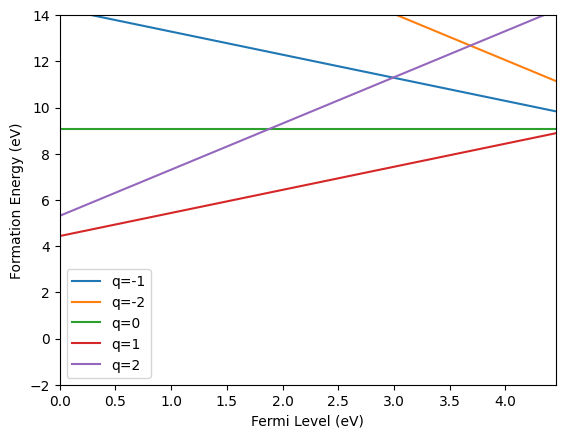

In [5]:
import numpy as np
import matplotlib.pyplot as plt

E_F = np.linspace(-0.27, 5, 500)

E_bulk = -1884.74137229 # Total energy of bulk
E_VBM = 7.2945          # Valence Band Maximum
E_CBM = 11.7449         # Conduction Band Minimum
n_B = -1                # Species removed
n_Ge = 1                # Species added
u_Ge = 0                # Chemical potential for the species added

# Path to the file
file_path = 'diagram_Ge_B.dat' 

# Read the data, skipping the header line
data = np.genfromtxt(file_path, skip_header=1, dtype=None, encoding=None)

for i in range(len(data)):
    E_for = data[i][7] - E_bulk - n_B*(data[i][5] + data[i][3]) - n_Ge*(data[i][6] + u_Ge) + data[i][1]*(E_F + E_VBM) + data[i][2]
    plt.plot(E_F, E_for, label=f'q={data[i][1]}')

plt.xlabel('Fermi Level (eV)')
plt.ylabel('Formation Energy (eV)')
plt.xlim(0,E_CBM - E_VBM)
plt.ylim(-2,14)
plt.legend()
plt.show()

#### 2. For the case of $B_{i}$

\begin{equation}
E_{form} = E_{def} - E_{bulk} - n_{removed}\left[E_{tot}(removed) + \mu_{removed}\right] - n_{added}\left[E_{tot}(added) + \mu_{added}\right] + q(\mu_{e} + E_{VBM}) + E_{corr}
\end{equation}

\begin{equation}
E_{form} = E_{def} - E_{bulk} - n_{B}\left[E_{tot}(B) + \mu_{B}\right] + q(\mu_{e} + E_{VBM}) + E_{corr}
\end{equation}

For the interstitial defect we don't remove any atom. We introduce B atom, so when B-rich ---> $\mu_{B}=0$ and $n_{B}=+1$

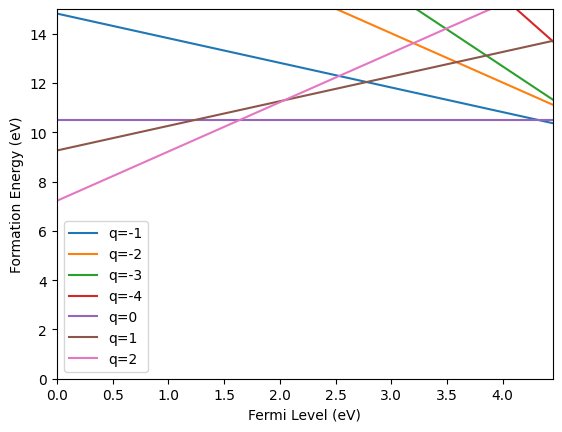

In [7]:
import numpy as np
import matplotlib.pyplot as plt

E_F = np.linspace(-0.27, 5, 500)

E_bulk = -1884.74137229 # Total energy of bulk
E_VBM = 7.2945          # Valence Band Maximum
E_CBM = 11.7449         # Conduction Band Minimum
n_i = 0                 # Species removed. In this case, only the variable is considered to preserve the structure of the example codes. 
E_tot_i = 0             # Total energy per atom for the species removed. In this case, only the variable is considered to preserve the structure of the example codes.
u_i = 0                 # Chemical potential for species removed. In this case, only the variable is considered to preserve the structure of the example codes.

n_B = 1                 # Species added
u_B = 0                 # Chemical potential for the species added

# Path to the file
file_path = 'B_i.dat' 

# Read the data, skipping the header line
data = np.genfromtxt(file_path, skip_header=1, dtype=None, encoding=None)

for i in range(len(data)):
    E_for = data[i][7] - E_bulk - n_i*(E_tot_i + u_i) - n_B*(data[i][6] + u_B) + data[i][1]*(E_F + E_VBM) + data[i][2]
    plt.plot(E_F, E_for, label=f'q={data[i][1]}')

plt.xlabel('Fermi Level (eV)')
plt.ylabel('Formation Energy (eV)')
plt.xlim(0,E_CBM - E_VBM)
plt.ylim(0,15)
plt.legend()
plt.show()

#### 3. For the case of $B_{N}$

\begin{equation}
E_{form} = E_{def} - E_{bulk} - n_{N}\left[E_{tot}(N) + \mu_{N}\right] - n_{B}\left[E_{tot}(B) + \mu_{B}\right] + q(\mu_{e} + E_{VBM}) + E_{corr}
\end{equation}

when B-rich:
- removed ----------> $n_{N}=-1$
- added -----------> $n_{B}=+1$, $\mu_{B}=0$

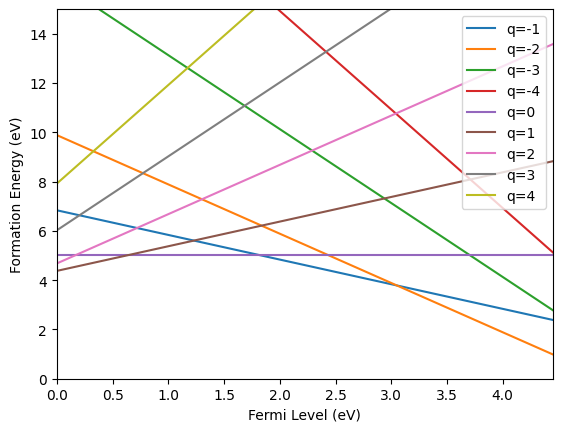

In [8]:
import numpy as np
import matplotlib.pyplot as plt

E_F = np.linspace(-0.27, 5, 500)

E_bulk = -1884.74137229 # Total energy of bulk
E_VBM = 7.2945          # Valence Band Maximum
E_CBM = 11.7449         # Conduction Band Minimum
n_N = -1                # Species removed

n_B = 1                 # Species added
u_B = 0                 # Chemical potential for the especies added

# Path to the file
file_path = 'B_N.dat' 

# Read the data, skipping the header line
data = np.genfromtxt(file_path, skip_header=1, dtype=None, encoding=None)

for i in range(len(data)):
    E_for = data[i][7] - E_bulk - n_N*(data[i][5] + data[i][3]) - n_B*(data[i][6] + u_B) + data[i][1]*(E_F + E_VBM) + data[i][2]
    plt.plot(E_F, E_for, label=f'q={data[i][1]}')

plt.xlabel('Fermi Level (eV)')
plt.ylabel('Formation Energy (eV)')
plt.xlim(0,E_CBM - E_VBM)
plt.ylim(0,15)
plt.legend()
plt.show()

## 4. For the case of $V_{B}-O_{N}$

\begin{equation}
E_{form} = E_{def} - E_{bulk} - n_{N}\left[E_{tot}(N) + \mu_{N}\right] - n_{O}\left[E_{tot}(O) + \mu_{O}\right] - n_{B}\left[E_{tot}(B) + \mu_{B}\right] + q(\mu_{e} + E_{VBM}) + E_{corr}
\end{equation}

when B-rich:
- removed ----------> $n_{N}=-1$
- added -----------> $n_{O}=+1$, $\mu_{O}=0$
- removed ----------> $n_{B}=-1$

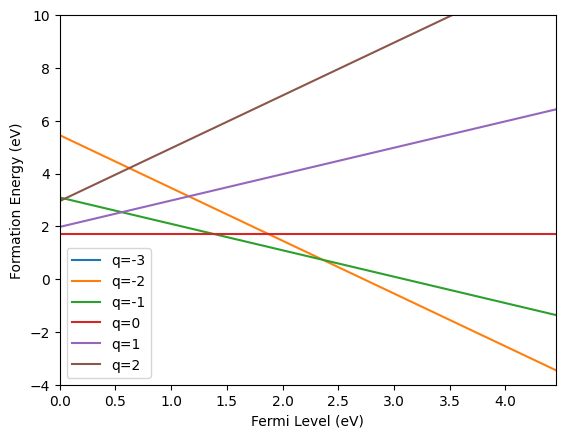

In [9]:
import numpy as np
import matplotlib.pyplot as plt

E_F = np.linspace(-0.27, 5, 500)

E_bulk = -1884.74137229 # Total energy of bulk
E_VBM = 7.2945          # Valence Band Maximum
E_CBM = 11.7449         # Conduction Band Minimum
n_N = -1                # Species removed

n_B = -1                # Species removed
u_B = 0                 # Chemical potential for the especies removed
n_O = 1                 # Species added
u_O = 0                 # Chemical potential for the especies added
E_tot_B = -6.704191     # Total energy per atom for the species removed 

# Path to the file
file_path = 'V_B-O_N.dat' 

# Read the data, skipping the header line
data = np.genfromtxt(file_path, skip_header=1, dtype=None, encoding=None)

for i in range(len(data)):
    E_for = data[i][7] - E_bulk - n_N*(data[i][5] + data[i][3]) - n_O*(data[i][6] + u_O) - n_B*(E_tot_B + u_B) + data[i][1]*(E_F + E_VBM) + data[i][2]
    plt.plot(E_F, E_for, label=f'q={data[i][1]}')

plt.xlabel('Fermi Level (eV)')
plt.ylabel('Formation Energy (eV)')
plt.xlim(0,E_CBM - E_VBM)
plt.ylim(-4,10)
plt.legend()
plt.show()

The .dat files to plot the above examples were created using **section 5.1.**, which are in the **[repository](https://github.com/JosephPVera/DFT-calculations/tree/main/pydefect/data)**.

# Steps to work with **[Pydefect package](https://kumagai-group.github.io/pydefect/index.html)**

For this description we will focus on the **defect folder**, specifically in the section on complex defects. Sections such as **unitcell** and **cpd** are very clear in Rayid Mojumder's repository (https://github.com/rayid-mojumder/GaN_Point_Defect_Investigation_with_DFT_VASP-PyDefect). You also can follow a set of videos from the Skillophilic channel (https://www.youtube.com/playlist?list=PLSm7ZQMDqBcdkODXc4n9LvCrBzmgtRQpA). 

I have included the **readme.md** file from Rayid Mojumder's repository in my [repository](https://github.com/JosephPVera/DFT-calculations/blob/main/pydefect/References/readme.md) only for academic reasons, given its usefulness (as a precaution in case it is deleted from the network).

# 1. Requirements

- Pydefect ----------------> pip install pydefect
- Vise --------------------> pip install vise
- mp-api ------------------> pip install mp-api
  
For upgrade any package, add --upgrade: **pip install --upgrade "package"**

## 1.1. Configure the .pmgrc.yaml file

Open the file with the command <span style="color:red">vim .config/.pmgrc.yaml</span> and write the following lines: <br> 

In [ ]:
PMG_DEFAULT_FUNCTIONAL: PBE_54 
PMG_MAPI_KEY: "introduce your API key" 
PMG_VASP_PSP_DIR: /path/to/the/potentials 

API key can be found in **[The Materials Project](https://next-gen.materialsproject.org/)**.

# 2. Folder scheme 

                                                        Main Folder
                                                             |
                     ------------------------------------------------------------------------------
                     |                                       |                                    |     
                  unitcell                                  cpd                                defect
                     |     
        -------------------------------------------------------
        |                |          |            |            |
    structure_opt      relax       band         dos       dielectric

Create the tree with the following commands: 


In [ ]:
mkdir "Main Folder"
cd "Main Folder" 
mkdir unitcell 
mkdir unitcell/structure_opt 
mkdir unitcell/relax 
mkdir unitcell/band 
mkdir unitcell/dos 
mkdir unitcell/dielectric 
mkdir cpd 
mkdir defect 

# 3. Calculations

## 3.1. Working on the **unitcell** folder

You must obtain and upload the POSCAR in the **structure_opt** folder.

For this section I recommend following **[Rayid Mojumder's repository ](https://github.com/rayid-mojumder/GaN_Point_Defect_Investigation_with_DFT_VASP-PyDefect)**.

## 3.2. Working on the **cpd** folder

For this section I recommend following **[Rayid Mojumder's repository ](https://github.com/rayid-mojumder/GaN_Point_Defect_Investigation_with_DFT_VASP-PyDefect)**.

## 3.3. Working on the **defect** folder

### 3.3.1. Creating the Supercell

Create a supercell of the relaxed unit cell. Use the command: 

In [ ]:
pydefect s -p ../unitcell/structure_opt/POSCAR --matrix 3 3 3

It is possible to change the values "3 3 3" according to your preferences, it refers to the transformation matrix. Check information with "pydefect_print" 

In [ ]:
pydefect_print supercell_info.json

For know the conventional cell

In [ ]:
vise si -p ../unitcell/structure_opt/POSCAR -c

### 3.3.2. Choosing defects

Incorporate defects with 

In [ ]:
pydefect ds

this command introduces antisites and vacancies using the native atoms. Defects and their oxidation states are stored in a **defect_in.yaml** file. Example: 

<center>
Va_B1: [-4, -3, -2, -1, 0, 1, 2] <br>
Va_N1: [-1, 0, 1, 2, 3, 4] <br>
N_B1: [-2, -1, 0, 1, 2] <br>
B_N1: [-2, -1, 0, 1, 2] 
<center>

For include impurity defects such as silicon and aluminium, use

In [ ]:
pydefect ds -d Si Al

For include interstitials defects, we must to generate volumetric data, e.g., AECCAR and LOCPOT, based on the standardized primitive cell, already done in DOS calculation. Get AECCAR0, AECCAR1, AECCAR2, and LOCPOT files generated by DOS calculation of the unit cell. See the local minima of the charge density. This creates **volumetric_data_local_extrema.json** file. Use the following commands:

In [ ]:
cp ../unitcell/dos/AECCAR0 .
cp ../unitcell/dos/AECCAR1 .
cp ../unitcell/dos/AECCAR2 .
cp ../unitcell/dos/LOCPOT .
pydefect_vasp le -v AECCAR{0,2} -i all_electron_charge

For example to add two interstitials defects

In [ ]:
pydefect_util ai --local_extrema volumetric_data_local_extrema.json -i 1 2

**Recommendation: Note that the local minima may not be the best initial points for some interstitials, so it's better to create your own defects (POSCAR) to ensure correct calculations.**

After that we need to rebuild the **defect_in.yaml** file with

In [ ]:
pydefect ds

and check the information

In [ ]:
pydefect_print defect_in.yaml

### 3.3.3. Creating defects

Now we create the defects in the supercell. The defects stored in **defect_in.yaml** file will be created, i.e it will create folders with POSCAR for each defect, with the command :

In [ ]:
pydefect_vasp de

Also create a **perfect** folder and copy the perfect supercell

In [ ]:
mkdir perfect
cp SPOSCAR ./perfect/POSCAR

run the following command in each of the defect folder to get that specific information

In [ ]:
pydefect_print defect_entry.json

In this point we will use **vise**, for create the INCAR, KPOINTS and POTCAR file in each defect folder run the command:

In [ ]:
for i in */;do cd $i; vise vs -t defect -uis ENCUT 520.0 NSW 140 NCORE 32 EDIFFG -0.03; cd ../;done

add your **jobfile** for each folder

In [ ]:
for i in */;do cd $i; cp /cluster/home/josephpa/cBN/defects/pydefect/native/unitcell/jobfile .; cd ../;done

run all the jobs at once

In [ ]:
for dir in */;do cd $dir; sub jobfile; cd ..; done

### 3.3.4. Parse results

Generate the **calc_results.json** files in each of the defect folder, it contains the first-principles calculation results related to the defect properties.

In [ ]:
pydefect_vasp cr -d *_*/ perfect
cd perfect
pydefect_vasp cr -d .
cd ..

### 3.3.5. Corrections of defect formation energies in finite-size supercells

Due the periodic boundary condition, the total energies for charged defects are not properly estimated due to interactions between a defect, its images, and background charge. The following command creates **correction.json** and **correction.pdf** files in each of the defect folder:

In [ ]:
pydefect efnv -d *_*/ -pcr perfect/calc_results.json -u ../unitcell/unitcell.yaml

The following command creates **defect_structure_info.json** files to analyze the defect local structures in each of the defect folder

In [ ]:
pydefect dsi -d *_*/

we can also create VESTA files (**defect.vesta**) with 

In [ ]:
pydefect_util dvf -d *_*/ 

### 3.3.6. Check defect eigenvalues and band-edge states in supercell calculations

Generally, point defects are categorized into three types.
1. Defects with deep localized states located inside the band gap.
2. Defects located at the band edges with loosely trapped by the charged defect centers.
3. Defects without any defect states inside the band gap or near the band edges, which would not largely affect the electronic properties.

Generates the **perfect_band_edge_state.json** files to show the information on the eigenvalues and orbital information of the VBM and CBM in the perfect supercell.

In [ ]:
pydefect_vasp pbes -d perfect

The **band_edge_orbital_infos.json** files are then created at defect directories using

In [ ]:
pydefect_vasp beoi -d *_* -pbes perfect/perfect_band_edge_state.json
# If the previous command give error, instead of the above command, it can work manually by the following command
for dir in *_*/; do cd $dir; pydefect bes -d . -pbes ../perfect/perfect_band_edge_state.json; cd ..; done

### 3.3.7. Plot defect formation energies

The plot of the defect formation energies requires multiple information, namely the band edges, chemical potentials of the competing phases, and total energies of the perfect and defective supercells.

Creates **defect_energy_info.yaml** file in each of the defect folder

In [ ]:
pydefect dei -d *_*/ -pcr perfect/calc_results.json -u ../unitcell/unitcell.yaml -s ../cpd/standard_energies.yaml

Create a **defect_energy_summary.json** file with the defect_energy_summary (= des) sub-command. This sub-command collect the information written in the **defect_energy_info.yaml** files to **defect_energy_summary.json**.

In [ ]:
pydefect des -d *_*/ -u ../unitcell/unitcell.yaml -pbes perfect/perfect_band_edge_state.json -t ../cpd/target_vertices.yaml

We can also create the **calc_summary.json** file with the calc_summary (= cs) sub-command.

In [ ]:
pydefect cs -d *_*/ -pcr perfect/calc_results.json

Finally, the defect formation energies are plotted as a function of the Fermi level with the plot_defect_formation_energy (= pe) sub-command

In [ ]:
pydefect plot_defect_formation_energy -d defect_energy_summary.json -l A --allow_shallow -y -2 10
pydefect plot_defect_formation_energy -d defect_energy_summary.json -l B --allow_shallow -y -2 10

**Reminder: A is related to target A, while B is related to target B in target_vertices.yaml file from cpd folder. This sets the rich conditions for each case.**

### **Tips to plot including another tags**: 
check the help with  

In [ ]:
pydefect pe -d defect_energy_summary.json
pydefect plot_defect_formation_energy -h

examples for adding tags

In [ ]:
pydefect plot_defect_formation_energy -d defect_energy_summary.json -l B -y -2 10 --no_corrections    # without corrections
pydefect plot_defect_formation_energy -d defect_energy_summary.json -l B -y -2 10 --no_label_line     # no labels within the lines
pydefect plot_defect_formation_energy -d defect_energy_summary.json -l A -y -2 10 --no_add_charges    # no labels for the charges
pydefect plot_defect_formation_energy -d defect_energy_summary.json -l A -y -2 10 --plot_all_energies # plot the complete lines

Seek for help in pydefect, use:

In [ ]:
pydefect_vasp (name_class) -h 
pydefect_vasp (name_class) --help

# 4. Calculations: Complex defects

For work with complex defects, we must create the POSCAR files ourselves. **Actually, this section is applicable to any type of defect that we have created ourselves.**

**IMPORTANT**: If you decide to create your own defects from scratch, i.e, without using the **sections 3.3.1., 3.3.2. and 3.3.3**; and want to get the corrections energy (finite-size effects) or plot the formation energy diagram using pydefect package will be necessary create the **defect_entry.json** file. To do this, you must run the following command in each of the defects folders.

**Reminder: In the INCAR file, for the neutral defect don't include the tag "NELECT" and for charged defects include the tag "NELECT", but no include comments after that tag.**

In [ ]:
NELECT = 198  # Number of valence electrons  ----------------> BAD !!!
NELECT = 198  -----------------------------------------------> GOOD !!!

**Before applying the command it is recommended to first run your jobs**, once that is done you can use the next command in each folder

In [ ]:
pydefect_vasp_util de -d . -p ../perfect/POSCAR -n "complex_defect"

or to apply at once in all the folders

In [ ]:
for dir in */;do cd $dir; pydefect_vasp_util de -d . -p ../perfect/POSCAR -n "complex_defect"; cd ../;done

If you have one defect (folders for all charges) with the perfect folder, the command run over all the folders except perfect folder, use:

In [ ]:
for dir in */; do [ "$dir" != "perfect/" ] && cd "$dir" && pydefect_vasp_util de -d . -p ../perfect/POSCAR -n "complex_defect" && cd ..; done

**Change the tag "complex_defect" to the name of your defect, to avoid issues with name repetition and mixing oxidation states, I recommend giving the same name to all oxidation states of the same defect. It is also important that the name contains only one underscore ( _ ) and one number at the end, for example: Va_B1, Va_N1, Si_B1, Al_N1, VaB1O_N1 and so on. This is important because the package recognizes it that way and doesn't generate any issues.**

Example: 

If you are going to work with 3 defects and each defect with different ranges of charges
- Va_B1: [-1, 0, 1]
- Va_N1: [-2, -1, 0, 1]
- B_N1: [-1, 0, 1, 2]

Run the same code for charges that belong to the same defect:

In [ ]:
pydefect_vasp_util de -d . -p ../perfect/POSCAR -n Va_B1     # run the same command in each folder of [-1, 0, 1]
pydefect_vasp_util de -d . -p ../perfect/POSCAR -n Va_N1     # run the same command in each folder of [-2, -1, 0, 1]
pydefect_vasp_util de -d . -p ../perfect/POSCAR -n B_N1      # run the same command in each folder of [-1, 0, 1, 2]

# 5. Some useful scripts

## 5.1. Check information on transition levels

In [2]:
import pandas as pd
import json

# Load the .json file
file_path = 'transition_levels.json'  # file path
with open(file_path, 'r') as f:
    data = json.load(f)

# Function to extract names, charges, energies, and fermi levels
def extract_transition_info(transition_data):
    name = transition_data['name']  
    charges = transition_data['charges']
    energies = transition_data['energies']
    fermi_levels = transition_data['fermi_levels']
    
    # List of tuples to associate charges with their corresponding energies and fermi levels
    transition_info = []
    for charge, energy, fermi in zip(charges, energies, fermi_levels):
        transition_info.append({
            'Name': name,
            'Charge': charge,
            'Energy (eV)': energy,
            'Fermi Level (eV)': fermi
        })
    return transition_info

transition_info_all = []

for transition in data['transition_levels']:
    transition_info = extract_transition_info(transition)
    transition_info_all.extend(transition_info)

df = pd.DataFrame(transition_info_all)

# Sort the data based on charges
df_sorted = df.sort_values(by='Charge')

print("Transition Levels:")
print(df_sorted.to_string(index=False))

Transition Levels:
Name   Charge  Energy (eV)  Fermi Level (eV)
Va_B [-2, -3]     5.166663          1.351653
Va_B [-1, -2]     4.352581          2.165735
Va_B  [0, -1]     2.698007          2.993022
Va_N   [1, 0]     7.619855          3.713011


## 5.1. Extracting Finite-Size Correction

In [7]:
import json
import pandas as pd

def load_defect_energy_summary(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

# Extract information
def extract_defect_info(data):
    rows = []

    for defect_name, defect_info in data['defect_energies'].items():
        charges = defect_info['charges']
        defect_energies = defect_info['defect_energies']
        
        for i, energy in enumerate(defect_energies):
            row = {
                'Name': defect_name,
                'charge': charges[i],
                'Finite-Size Correction': energy['energy_corrections']['pc term'],
            }
            rows.append(row)

    # Create dataframe
    df = pd.DataFrame(rows)
    return df

json_file = 'defect_energy_summary.json'  # Path 
data = load_defect_energy_summary(json_file)
defect_df = extract_defect_info(data)

# Add the CBM 
#defect_df['cbm'] = data['cbm']

# Sort the data
defect_df.sort_values(by=['Name', 'charge'], inplace=True)

print(defect_df.to_string(index=False))

 Name  charge  Finite-Size Correction
Va_B1      -4                4.321815
Va_B1      -3                2.431021
Va_B1      -2                1.080454
Va_B1      -1                0.270113
Va_B1       0                0.000000
Va_B1       1                0.270113
Va_B1       2                1.080454
Va_N1      -1                0.270113
Va_N1       0                0.000000
Va_N1       1                0.270113
Va_N1       2                1.080454
Va_N1       3                2.431021
Va_N1       4                4.321815


## 5.2. Extracting total energy for each defect

In [8]:
import os
import json
import pandas as pd

def extract_energy(json_file):
    with open(json_file, "r") as file:
        data = json.load(file)
        # Check for energy data
        if 'energy' in data:
            return data['energy']
        else:
            return None  

def scan_directories(base_directory):
    data = [] # store name, charge, and energy values

    # Iterate over all folders and find calc_results.json files
    for root, dirs, files in os.walk(base_directory):
        if "calc_results.json" in files:
            folder_name = os.path.basename(root)  # get the folder name
            name_part = '_'.join(folder_name.split('_')[:-1])  # Extract the name (everything before the last underscore)
            charge = folder_name.split('_')[-1]  # Extract the last part as charge
            json_path = os.path.join(root, "calc_results.json")
            energy = extract_energy(json_path)
            if energy is not None:
                data.append({"Name": name_part, "Charge": charge, "Total Energy (eV)": energy})  

    # Collected data
    df = pd.DataFrame(data)

    # Sort by Name
    df_sorted = df.sort_values(by="Name")
    return df_sorted

# Replace with your base directory
df_results = scan_directories("../defect")

print(df_results.to_string(index=False))

 Name  Charge  Total Energy (eV)
      perfect       -1884.741372
Va_B1      -2       -1853.359235
Va_B1       0       -1870.306749
Va_B1      -4       -1832.257336
Va_B1      -1       -1861.996537
Va_B1      -3       -1844.375537
Va_B1       2       -1884.650678
Va_B1       1       -1877.519760
Va_N1      -1       -1857.351796
Va_N1       1       -1879.978478
Va_N1       3       -1895.876358
Va_N1       4       -1902.954856
Va_N1       2       -1887.602492
Va_N1       0       -1868.795535


## 5.3. Sorting and save information on the calculations

The file created here will be used to plot the formation energy diagram ourselves. **Hint:** For use with your own information, you must change the species B and N.

In [4]:
import os
import json
import pandas as pd
import yaml

# Load a .json file
def load_defect_energy_summary(json_file):
    with open(json_file, 'r') as f:
        data = json.load(f)
    return data

# Function to extract relevant information from the defect energy summary
def extract_defect_info(data):
    rows = []
    for defect_name, defect_info in data['defect_energies'].items():
        charges = defect_info['charges']
        defect_energies = defect_info['defect_energies']
        
        for i, energy in enumerate(defect_energies):
            row = {
                '#Name': defect_name,
                'Charge': str(charges[i]),  # Convert charge to string
                'Finite-Size': energy['energy_corrections']['pc term']
            }
            rows.append(row)

    # Create DataFrame
    df_defect = pd.DataFrame(rows)
    return df_defect

# Load a .yaml file
def load_yaml_file(yaml_file):
    with open(yaml_file, 'r') as f:
        data = yaml.safe_load(f)
    return data

# Extract energy from calc_results.json
def extract_energy(json_file):
    with open(json_file, "r") as file:
        data = json.load(file)
        # Check for energy data
        if 'energy' in data:
            return data['energy']
        else:
            return None  

# Scan directories and extract energy, name and charge
def scan_directories(base_directory):
    data = []  # store name, charge, and energy values

    # Iterate over all folders and find calc_results.json files
    for root, dirs, files in os.walk(base_directory):
        if "calc_results.json" in files:
            folder_name = os.path.basename(root)  # get the folder name
            name_part = '_'.join(folder_name.split('_')[:-1])  # Extract the name (everything before the last underscore)
            charge = folder_name.split('_')[-1]  # Extract the last part as charge
            json_path = os.path.join(root, "calc_results.json")
            energy = extract_energy(json_path)
            if energy is not None:
                data.append({"Name": name_part, "Charge": charge, "Total Energy (eV)": energy}) 

    # Collected data
    df_energy = pd.DataFrame(data)
    return df_energy

# Path to files, following the tree of pydefect
json_file = 'defect_energy_summary.json'  
target_yaml_file = '../cpd/target_vertices.yaml'  
standard_yaml_file = '../cpd/standard_energies.yaml' 
base_directory = '../defect'  # path to apply the scan_directories function

# Load defect energy data
data = load_defect_energy_summary(json_file)
defect_df = extract_defect_info(data)

# Load energy data from calc_results.json files
energy_df = scan_directories(base_directory)

# Ensure charge columns are strings before merging
defect_df['Charge'] = defect_df['Charge'].astype(str)
energy_df['Charge'] = energy_df['Charge'].astype(str)

# Merge the defect dataframe with the energy dataframe
merged_df = pd.merge(defect_df, energy_df, left_on=['#Name', 'Charge'], right_on=['Name', 'Charge'])

# Load target_vertices data
target_data = load_yaml_file(target_yaml_file)

# Load standard_energies data
standard_data = load_yaml_file(standard_yaml_file)

# Function to get chemical potential
def get_chem_pot(phase, species, name):
    parts = name.split('_')
    if 'i' in parts[1]:
        return 0.0
    
    if parts[1].startswith("N"):
        return target_data[phase]['chem_pot'].get("N", None)  # If "B" after underscore, use N for chemical potential
    elif parts[1].startswith("B"):
        return target_data[phase]['chem_pot'].get("B", None)  # If "N" after underscore, use B for chemical potential
    return None

# Function to extract energies for added and removed atoms
def get_energy_added_removed(name, standard_data):
    # Split the name to get the added and removed atoms
    parts = name.split('_')
    added_atom = parts[0]  # Atom added is before the underscore
    removed_atom = parts[1][0]  # Atom removed is the first letter after the underscore (ignore the number)

    # Get the energy for the added atom from standard_energies.yaml
    energy_added = standard_data.get(added_atom, 0.0)

    if 'i' in parts[1]:
        energy_removed = 0.0  # If 'i' is in the name, then the removed atom energy is zero
    else:
        # Otherwise, get the energy from the standard_energies.yaml file
        energy_removed = standard_data.get(removed_atom, None)
        
        if energy_removed is None:
            print(f"Warning: Removed atom '{removed_atom}' not found in standard energies.")
            energy_removed = 0.0

    return energy_removed, energy_added

# Create columns for chemical potentials from both targets
merged_df['Chem Pot (A)'] = merged_df['#Name'].apply(
    lambda x: get_chem_pot('A', "B", x) if "B" in x else get_chem_pot('A', "N", x)
)
merged_df['Chem Pot (B)'] = merged_df['#Name'].apply(
    lambda x: get_chem_pot('B', "B", x) if "B" in x else get_chem_pot('B', "N", x)
)

# Columns for Total_energy(removed) and Total_energy(added)
merged_df['Total_energy(removed)'], merged_df['Total_energy(added)'] = zip(*merged_df['#Name'].apply(
    lambda x: get_energy_added_removed(x, standard_data)
))

final_output = merged_df[['#Name', 'Charge', 'Finite-Size', 'Chem Pot (A)', 'Chem Pot (B)', 'Total_energy(removed)', 'Total_energy(added)', 'Total Energy (eV)']]

# Sort by Name and Charge
final_output_sorted = final_output.sort_values(by=['#Name', 'Charge'])

# Save
final_output_sorted.to_csv('formation_diagram_new.dat', sep='\t', header=True, index=False, float_format='%.6f')

print(final_output_sorted.to_string(index=False))

#Name Charge  Finite-Size  Chem Pot (A)  Chem Pot (B)  Total_energy(removed)  Total_energy(added)  Total Energy (eV)
Va_B1     -1     0.270113       0.00000      -2.56377              -6.704191                  0.0       -1861.996537
Va_B1     -2     1.080454       0.00000      -2.56377              -6.704191                  0.0       -1853.359235
Va_B1     -3     2.431021       0.00000      -2.56377              -6.704191                  0.0       -1844.375537
Va_B1     -4     4.321815       0.00000      -2.56377              -6.704191                  0.0       -1832.257336
Va_B1      0     0.000000       0.00000      -2.56377              -6.704191                  0.0       -1870.306749
Va_B1      1     0.270113       0.00000      -2.56377              -6.704191                  0.0       -1877.519760
Va_B1      2     1.080454       0.00000      -2.56377              -6.704191                  0.0       -1884.650678
Va_N1     -1     0.270113      -2.56377       0.00000           

## 5.4. Plotting the formation energy diagram

we will use the file saved from section 5.1. **Hint:** For use with your own information, you must change the species B, N and the constants E_bulk, E_VBM and E_CBM. **This script don't work for divacancy, it needs to be improved.**

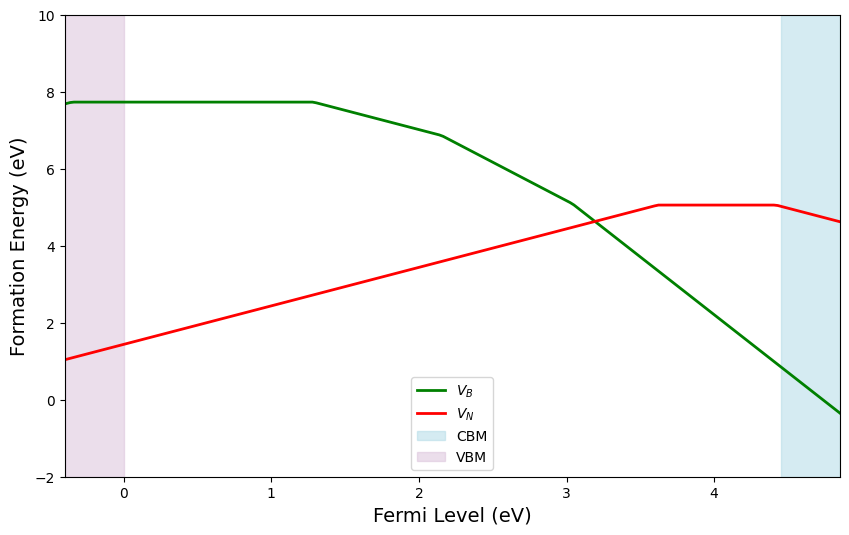

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

M = 1  # 1 =  B-rich and  2 = N-rich)

file_path = 'formation_diagram_new.dat'
columns = ['Defect', 'Charge', 'E_corr', 'Chem_pot_A', 'Chem_pot_B', 'E_tot_removed', 'E_tot_added', 'E_def']
data = pd.read_csv(file_path, delim_whitespace=True, names=columns, skiprows=1)
data['Charge'] = pd.to_numeric(data['Charge'], errors='coerce')
data['E_corr'] = pd.to_numeric(data['E_corr'], errors='coerce')
data['E_tot_removed'] = pd.to_numeric(data['E_tot_removed'], errors='coerce')
data['E_tot_added'] = pd.to_numeric(data['E_tot_added'], errors='coerce')
data['E_def'] = pd.to_numeric(data['E_def'], errors='coerce')
chem_pot_col = f'Chem_pot_{"A" if M == 1 else "B"}'
data[chem_pot_col] = pd.to_numeric(data[chem_pot_col], errors='coerce')

# Drop rows with NaN values
data = data.dropna(subset=['Charge', 'E_corr', chem_pot_col, 'E_tot_removed', 'E_tot_added', 'E_def'])

# Constants, you should change based on your own information.
E_bulk = -1884.741372
E_VBM, E_CBM = 7.2945, 11.7449
E_F = np.linspace(-5, 8, 500)

# Function to compute formation energy
def formation_energy(row, E_F):
    main_part, sub_part = row['Defect'].split('_')
    chem_pot_removed = row[chem_pot_col] if sub_part[0] in ['B', 'N'] else 0 

    n_i_removed = -1 if sub_part[0] in ['B', 'N'] else 0
    n_i_added = 0 if main_part in ['Va', 'V'] else 1  
    if main_part == 'B':
        n_i_added = 1
        chem_pot_added = -2.563770 
    elif main_part == 'N':
        n_i_added = 1
        chem_pot_added = 0 
    else:
        n_i_added = 1
        chem_pot_added = 0

    return (row['E_def'] - E_bulk
            - n_i_removed * (row['E_tot_removed'] + chem_pot_removed)
            - n_i_added * (row['E_tot_added'] + chem_pot_added)
            + row['Charge'] * (E_F + E_VBM)
            + row['E_corr'])

# Plotting minimal formation energy curves
min_curves = {}
for defect, group in data.groupby('Defect'):
    min_formation_energy = np.inf * np.ones_like(E_F)
    for _, row in group.iterrows():
        formation_energies = formation_energy(row, E_F)
        min_formation_energy = np.minimum(min_formation_energy, formation_energies)
    min_curves[defect] = min_formation_energy

# Plotting the curves
color_map = ['g', 'r', 'b', 'm', 'c', 'y']
plt.figure(figsize=(10, 6))

for idx, (defect_name, min_formation_energy) in enumerate(min_curves.items()):
    # Modify defect name for the label
    modified_label = defect_name.replace("Va", "V").rstrip('0123456789')  # Remove digits
                
    # Construct the label in Latex format
    main_label = modified_label.split('_')[0]  # Get the main part before underscore
    sub_label = modified_label.split('_')[1] if len(modified_label.split('_')) > 1 else ''  # Get part after underscore
    label = f"${main_label}_{{{sub_label}}}$" if sub_label else f"${main_label}$"  # Latex format
    
    defect_color = color_map[idx % len(color_map)] 
    plt.plot(E_F, min_formation_energy, label=label, linestyle='-', linewidth=2, color=color_map[idx % len(color_map)])

plt.xlim(-0.4, E_CBM - E_VBM + 0.4)
plt.ylim(-2, 10)
plt.xlabel('Fermi Level (eV)', fontsize=14)
plt.ylabel('Formation Energy (eV)', fontsize=14)
plt.axvspan(E_CBM - E_VBM, E_CBM - E_VBM + 0.4, color='lightblue', alpha=0.5, label='CBM')
plt.axvspan(-0.4, 0, color='thistle', alpha=0.5, label='VBM')
plt.legend(loc='best')

# Save
plt.savefig('B-rich.png', dpi=100) if M == 1 else plt.savefig('N-rich.png', dpi=100)

plt.show()

## 5.5. Plotting the formation energy diagram using the pydefect plotter (a bit of customization)

<span style="color:red">**Reminder: Before plotting using this modified script, get all information using the default defect_energy_plotter.py (original script). After that you can change by the custom default_energy_plotter.py. That is, use the default defect_energy_plotter.py in the sections 4., 3.3.4., 3.3.5., 3.3.6. and 3.3.7.**</span>

To do this, we will need to modify the **defect_energy_plotter.py**, in the next script We can customize the labels, legends and add a few other things a bit.

To avoid causing problems with legend customization, add the tag **--no_label_line** to the command, for example:

In [ ]:
pydefect plot_defect_formation_energy -d defect_energy_summary.json -l B --allow_shallow -y 0 10 --no_label_line

Important:
- The colors are defined in **pydefect/defaults.py**
- To change the format for saving figures: **pydefect/cli/main_functions.py**
- Add any tags in the commands: **pydefect/cli/main.py**

The scripts **defect_energy_plotter.py**, **defaults.py** and **main_functions.py** are in this [repository](https://github.com/JosephPVera/DFT-calculations/tree/main/pydefect/scripts).

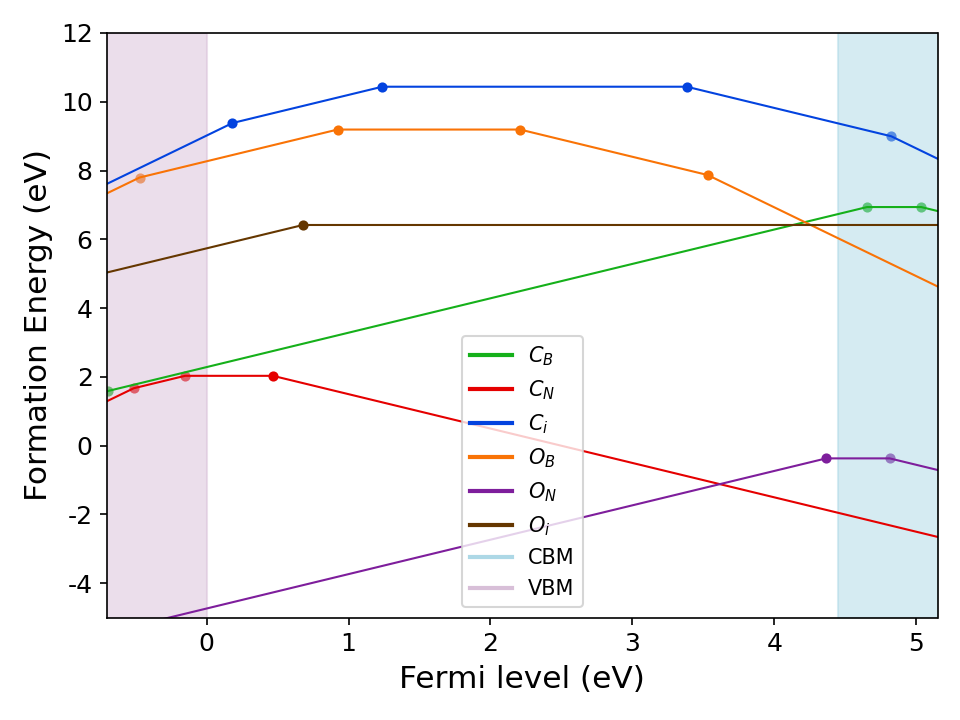

In [10]:
from wand.image import Image as WImage
img = WImage(filename='energy_A.png')
img